<a href="https://colab.research.google.com/github/leehyunggeunkeun/pytorch-study/blob/master/pytorch_0417_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

간단한 다중선형회귀 예제

Iris data를 활용하여 sepal length, sepal width, petal length의 변화에 따른 petal width 구하기!!!

In [0]:
#필요한 라이브러리 불러오기 

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch.utils.data import Dataset
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

df = load_iris()

In [2]:
torch.manual_seed(1)

데이터 불러오기

In [3]:
# 데이터프레임형식으로 변환
df=pd.DataFrame(data=df['data'],columns=df['feature_names'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
standard_df=df
standard_df=standard_df.apply(lambda x: (x-x.mean())/x.std())
standard_df['petal width (cm)']=df['petal width (cm)']
standard_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.897674,1.015602,-1.335752,0.2
1,-1.139200,-0.131539,-1.335752,0.2
2,-1.380727,0.327318,-1.392399,0.2
3,-1.501490,0.097889,-1.279104,0.2
4,-1.018437,1.245030,-1.335752,0.2
...,...,...,...,...
145,1.034539,-0.131539,0.816859,2.3
146,0.551486,-1.278680,0.703564,1.9
147,0.793012,-0.131539,0.816859,2.0
148,0.430722,0.786174,0.930154,2.3


In [5]:
#150 x 4라는 아주 작은 데이터셋 
#x는 모든행을 불러오고 마지막 petal width를 제외하고 불러오고, y는 모든행을 가진 petal width열만
x,y=df.values[:,:-1],df.values[:,-1:]
x.shape, y.shape

((150, 3), (150, 1))

커스텀 데이터셋 만들기

In [0]:
#커스텀 데이터셋을 만드는 가장 기본적인 뼈대

class Iris():
    def __init__(self):
        self.x_data = torch.FloatTensor(x)
        self.y_data = torch.FloatTensor(y)
    
    def __len__(self):
        return len(self.x_data)
  
    def __getitem__(self, idx):
        x = self.x_data[idx]
        y = self.y_data[idx]
        return x, y


In [7]:
#만약 CLASS로만 구현하고자 한다면

'''class MultiLinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear=nn.Linear(3,1)

    def forward(self,x):
        return self.linear(x)

model=MultiLinearRegression()

optimizer = optim.SGD(model.parameters(), lr=1e-5)


nb_epochs=2000
train_losses=[]
for epoch in range(nb_epochs+1):
    for batch_idx, samples in enumerate(dataloader):
        x_train, y_train = samples
        

        prediction = model(x_train)
        cost = F.mse_loss(prediction, y_train)



        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        train_losses.append(cost.item())


        if epoch % 100 == 0:
            print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, batch_idx+1, len(dataloader),
            cost.item()
             ))'''

"class MultiLinearRegression(nn.Module):\n    def __init__(self):\n        super().__init__()\n        self.linear=nn.Linear(3,1)\n\n    def forward(self,x):\n        return self.linear(x)\n\nmodel=MultiLinearRegression()\n\noptimizer = optim.SGD(model.parameters(), lr=1e-5)\n\n\nnb_epochs=2000\ntrain_losses=[]\nfor epoch in range(nb_epochs+1):\n    for batch_idx, samples in enumerate(dataloader):\n        x_train, y_train = samples\n        \n\n        prediction = model(x_train)\n        cost = F.mse_loss(prediction, y_train)\n\n\n\n        optimizer.zero_grad()\n        cost.backward()\n        optimizer.step()\n        train_losses.append(cost.item())\n\n\n        if epoch % 100 == 0:\n            print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(\n            epoch, nb_epochs, batch_idx+1, len(dataloader),\n            cost.item()\n             ))"

In [8]:
dataset=Iris()

train_val_ratio=0.8
train_size=int(len(dataset)*train_val_ratio)
val_size=len(dataset)-train_size
print(train_size,val_size)


train_dataset, val_dataset = torch.utils.data.random_split(dataset,[train_size,val_size])
print(len(train_dataset), len(val_dataset))


120 30
120 30


In [9]:
len(dataset),dataset[0]  #총 샘플의수 150개 0번째 샘플의 x는 5.1,3.5,1.4 y는 0.2

(150, (tensor([5.1000, 3.5000, 1.4000]), tensor([0.2000])))

In [0]:
train_loader=DataLoader(dataset=train_dataset,batch_size=len(dataset),shuffle=True) 
val_loader=DataLoader(dataset=val_dataset,batch_size=len(dataset),shuffle=True) 

모델 학습하기

In [11]:
model = nn.Linear(3,1)      #input 3 ouput 1
print(list(model.parameters())) #초기화된 w,b값 확인
optimizer = optim.SGD(model.parameters(), lr=1e-5)

[Parameter containing:
tensor([[ 0.3888, -0.1955,  0.5641]], requires_grad=True), Parameter containing:
tensor([-0.0667], requires_grad=True)]


In [12]:
nb_epochs=2000
train_losses=[]
val_losses = []

for epoch in range(nb_epochs+1):
    for batch_idx, samples in enumerate(train_loader):
        x_train, y_train = samples
        

        prediction = model(x_train)
        cost = F.mse_loss(prediction, y_train)



        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        train_losses.append(cost.item())


        if epoch % 100 == 0:
            print('Epoch {:4d}/{} Batch {}/{} Train Cost: {:.6f}'.format(
            epoch, nb_epochs, batch_idx+1, len(train_loader),
            cost.item()
             ))
            
    for batch_idx, samples in enumerate(val_loader):
        x_val, y_val = samples

        prediction = model(x_val)
        cost = F.mse_loss(prediction, y_val)

        val_losses.append(cost.item())

        if epoch % 100 == 0:
            print('Epoch {:4d}/{} Batch {}/{} Validation Cost: {:.6f}'.format(
            epoch, nb_epochs, batch_idx+1, len(val_loader),
            cost.item()
             ))
            print('-'*50)

Epoch    0/2000 Batch 1/1 Train Cost: 6.799528
Epoch    0/2000 Batch 1/1 Validation Cost: 6.779358
--------------------------------------------------
Epoch  100/2000 Batch 1/1 Train Cost: 5.342718
Epoch  100/2000 Batch 1/1 Validation Cost: 5.350499
--------------------------------------------------
Epoch  200/2000 Batch 1/1 Train Cost: 4.201688
Epoch  200/2000 Batch 1/1 Validation Cost: 4.228774
--------------------------------------------------
Epoch  300/2000 Batch 1/1 Train Cost: 3.307986
Epoch  300/2000 Batch 1/1 Validation Cost: 3.347900
--------------------------------------------------
Epoch  400/2000 Batch 1/1 Train Cost: 2.607986
Epoch  400/2000 Batch 1/1 Validation Cost: 2.655919
--------------------------------------------------
Epoch  500/2000 Batch 1/1 Train Cost: 2.059705
Epoch  500/2000 Batch 1/1 Validation Cost: 2.112123
--------------------------------------------------
Epoch  600/2000 Batch 1/1 Train Cost: 1.630250
Epoch  600/2000 Batch 1/1 Validation Cost: 1.684590
-

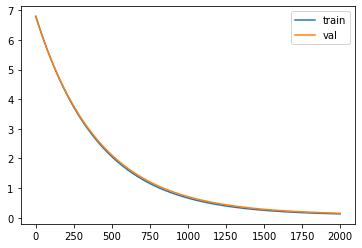

In [13]:
plt.plot(train_losses, label='train')
plt.plot(val_losses, label='val')
plt.legend()
plt.show()

예측하기

In [0]:
#잠깐 근데 x_test값은 어떻게 나누지???

[Parameter containing:
tensor([[ 0.1609, -0.3065,  0.4022]], requires_grad=True), Parameter containing:
tensor([-0.1041], requires_grad=True)]


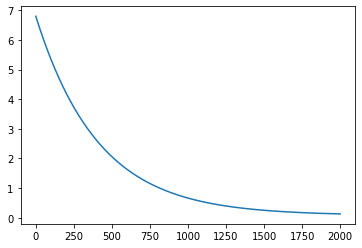

In [15]:
print(list(model.parameters())) #학습후 w와 b의 값 확인

#epoch에 따른 train_losses 변화

plt.plot(train_losses)
plt.show()

In [16]:
new_var=torch.FloatTensor([[6.9,2.0,7.1]]) 
pred_y=model(new_var)

print('훈련 후 입력이 6.9, 2.0, 7.1 일때의 예측값: ',pred_y)

훈련 후 입력이 6.9, 2.0, 7.1 일때의 예측값:  tensor([[3.2489]], grad_fn=<AddmmBackward>)
